In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/Shareddrives"

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
import keras
from keras.optimizers import *
from keras.initializers import *

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

from itertools import chain

## Import data

In [ ]:
music = pd.read_csv('/content/drive/Shareddrives/ML_Final/Music_Data/Music_Genre_Data/features_30_sec.csv')
music.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
X = music.drop(['filename', 'length', 'label'], axis = 1)
y = music[['label']]

In [ ]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns = X.columns)
X_scale.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,-0.661934,...,-0.086396,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988
1,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,0.795823,...,-0.048102,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421
2,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,-0.744406,...,0.284825,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954
3,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,-0.246530,...,-0.080249,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508
4,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,-0.190517,...,-1.238616,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287


In [ ]:
y = pd.get_dummies(y)
y

,label_blues,label_classical,label_country,label_disco,label_hiphop,label_jazz,label_metal,label_pop,label_reggae,label_rock
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,1
996,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,1


## Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, train_size = 0.8, test_size = 0.2, random_state = 12)

## Model

In [ ]:
ACCURACY_THRESHOLD = 0.94

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True
def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback], verbose = 1)

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
model_1 = Sequential([
    Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    Dense(15, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax'),
])
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1160      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 1,635
Trainable params: 1,635
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax'),
])
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               7424      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
7/7 [==============================] - 1s 39ms/step - loss: 2.5031 - accuracy: 0.1300 - val_loss: 2.3222 - val_accuracy: 0.2100
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 2.4104 - accuracy: 0.1450 - val_loss: 2.2559 - val_accuracy: 0.2200
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 2.3320 - accuracy: 0.1437 - val_loss: 2.2060 - val_accuracy: 0.2250
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2781 - accuracy: 0.1600 - val_loss: 2.1654 - val_accuracy: 0.2150
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2062 - accuracy: 0.1762 - val_loss: 2.1289 - val_accuracy: 0.2200
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 2.1998 - accuracy: 0.1975 - val_loss: 2.0953 - val_accuracy: 0.2200
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 2.1194 - accuracy: 0.2163 - val_loss: 2.0683 - val_accuracy: 0.2350
Epoch 8/200
7/7 [========

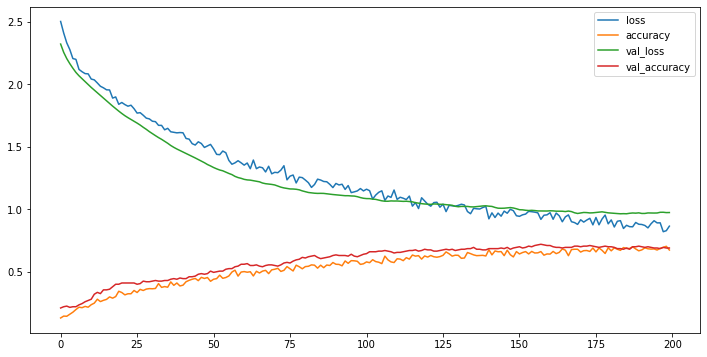

In [ ]:
model_1_history = trainModel(model=model_1, epochs=200, optimizer='adam')
plotHistory(model_1_history)

Epoch 1/200
7/7 [==============================] - 1s 35ms/step - loss: 2.4744 - accuracy: 0.1100 - val_loss: 2.1085 - val_accuracy: 0.2200
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 2.0838 - accuracy: 0.2375 - val_loss: 1.8608 - val_accuracy: 0.4100
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 1.8631 - accuracy: 0.3525 - val_loss: 1.6990 - val_accuracy: 0.4100
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 1.7268 - accuracy: 0.3900 - val_loss: 1.5630 - val_accuracy: 0.4700
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 1.5795 - accuracy: 0.4437 - val_loss: 1.4501 - val_accuracy: 0.5000
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 1.4623 - accuracy: 0.4963 - val_loss: 1.3516 - val_accuracy: 0.5200
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 1.4161 - accuracy: 0.5075 - val_loss: 1.2796 - val_accuracy: 0.5400
Epoch 8/200
7/7 [=========

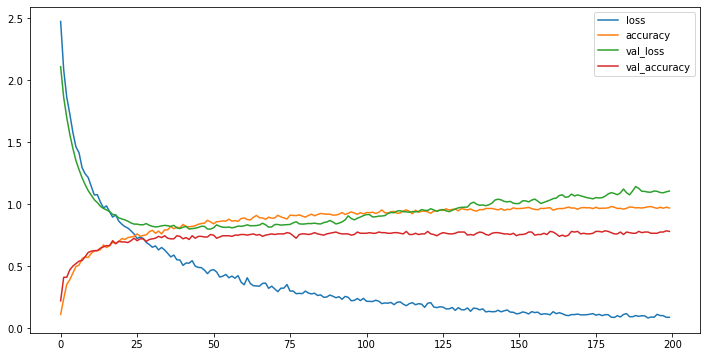

In [ ]:
model_2_history = trainModel(model=model_2, epochs=200, optimizer='adam')
plotHistory(model_2_history)

In [ ]:
train_loss, train_acc  = model_1.evaluate(X_train, y_train, batch_size=128)
test_loss, test_acc  = model_1.evaluate(X_test, y_test, batch_size=128)


2/2 [==============================] - 0s 7ms/step - loss: 0.9739 - accuracy: 0.6900


In [ ]:
train_loss_2, train_acc_2  = model_2.evaluate(X_train, y_train, batch_size=128)
test_loss_2, test_acc_2  = model_2.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 7ms/step - loss: 1.1058 - accuracy: 0.7800


In [ ]:
import tensorflow
predictions = model_1.predict(X_test)
y_pred = (predictions > 0.5)

y_pred.argmax(axis=1)

array([5, 8, 0, 0, 7, 8, 7, 8, 0, 6, 5, 0, 5, 0, 2, 8, 1, 0, 8, 1, 2, 0,
       1, 0, 9, 1, 3, 0, 4, 7, 3, 0, 6, 3, 6, 7, 6, 2, 6, 1, 5, 6, 1, 6,
       7, 5, 2, 0, 0, 0, 1, 4, 9, 1, 0, 1, 6, 3, 0, 6, 0, 5, 4, 6, 8, 4,
       5, 4, 1, 0, 6, 1, 6, 0, 6, 0, 0, 0, 5, 0, 7, 4, 4, 8, 6, 0, 7, 1,
       5, 0, 9, 2, 0, 5, 2, 4, 7, 5, 0, 1, 0, 7, 7, 7, 6, 8, 4, 9, 0, 0,
       8, 6, 1, 8, 0, 0, 7, 1, 0, 3, 7, 4, 0, 4, 0, 4, 0, 0, 8, 2, 2, 9,
       0, 0, 1, 0, 0, 6, 0, 6, 4, 2, 0, 0, 1, 1, 0, 5, 5, 6, 0, 7, 0, 1,
       6, 4, 6, 4, 0, 1, 8, 2, 4, 6, 7, 0, 7, 0, 8, 2, 0, 0, 1, 0, 0, 0,
       8, 1, 6, 0, 4, 6, 0, 1, 1, 3, 8, 6, 0, 2, 0, 0, 0, 7, 7, 0, 7, 0,
       1, 5])

In [ ]:
y_test1 = y_test.to_numpy()

In [ ]:
y_test1.argmax(axis=1)

array([5, 8, 7, 2, 3, 8, 7, 8, 9, 3, 5, 3, 5, 5, 0, 8, 1, 9, 8, 1, 9, 3,
       1, 3, 3, 1, 3, 4, 4, 7, 3, 9, 6, 3, 6, 7, 0, 2, 6, 1, 5, 9, 1, 4,
       7, 5, 2, 0, 0, 9, 1, 8, 9, 5, 2, 1, 6, 3, 3, 3, 5, 5, 4, 6, 8, 4,
       5, 4, 5, 3, 6, 1, 6, 8, 6, 0, 8, 0, 5, 3, 7, 7, 4, 8, 3, 2, 7, 1,
       5, 7, 9, 9, 2, 5, 2, 4, 8, 5, 0, 1, 9, 7, 7, 4, 6, 8, 4, 9, 8, 5,
       8, 6, 5, 8, 5, 2, 7, 1, 2, 3, 7, 0, 3, 3, 9, 4, 4, 3, 8, 2, 2, 9,
       0, 9, 1, 9, 4, 6, 5, 0, 4, 2, 9, 0, 3, 1, 5, 5, 7, 9, 9, 4, 4, 1,
       6, 3, 6, 4, 4, 1, 8, 2, 4, 6, 7, 3, 7, 0, 8, 2, 3, 0, 1, 9, 8, 0,
       3, 1, 6, 4, 4, 6, 3, 1, 1, 9, 8, 6, 3, 8, 6, 3, 7, 7, 7, 9, 7, 9,
       0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
categories = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", 'rock']
pd.DataFrame(confusion_matrix(y_test1.argmax(axis=1), y_pred.argmax(axis=1)), index=categories)

,0,1,2,3,4,5,6,7,8,9
blues,10,1,1,0,1,0,2,0,0,0
classical,0,20,0,0,0,1,0,0,0,0
country,6,0,8,0,0,0,0,0,0,0
disco,13,1,0,5,2,0,3,1,1,1
hiphop,6,0,0,0,12,0,1,2,0,0
jazz,6,3,0,0,0,12,0,0,0,0
metal,1,0,0,0,0,0,17,0,0,0
pop,3,0,0,0,1,1,0,15,0,0
reggae,4,0,1,0,1,0,0,1,14,0
rock,13,0,2,1,0,0,2,0,0,4
